In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\vikra\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [6]:
data.dropna(axis= 1,how = 'all',inplace = True)
data.dropna(axis = 0,how = 'all',inplace = True)

here deleted the none type column and row.

In [7]:
data['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [8]:
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['ytick.color'] = 'red'

### TV Show vs Movies

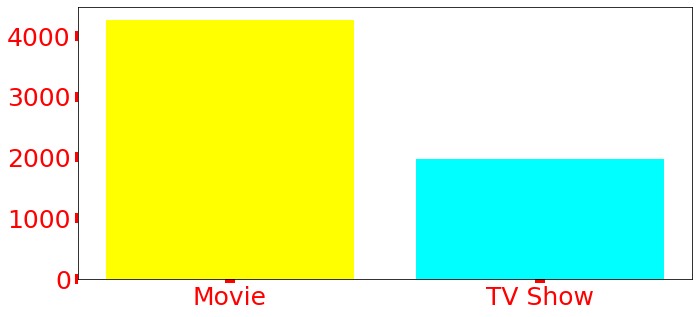

In [9]:
plt.figure(figsize = (11,5))
plt.bar(data['type'].value_counts().index,data['type'].value_counts().values,color = ['yellow','cyan'])
plt.tick_params(width = 10)
plt.show()

### TV Show vs Movies in India

In [10]:
data[data['country']=='India']['type'].value_counts()

Movie      724
TV Show     53
Name: type, dtype: int64

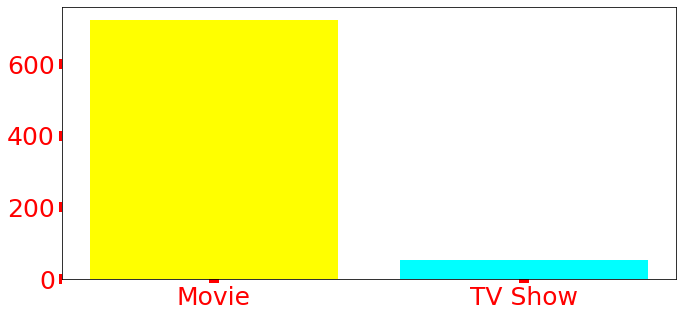

In [11]:
plt.figure(figsize = (11,5))
plt.bar(data[data['country']=='India']['type'].value_counts().index,data[data['country']=='India']['type'].value_counts().values,color = ['yellow','cyan'])
plt.tick_params(width = 10)
plt.show()

we can see a big difference between tv show and movies. In India people like to watch movies more than tv shows.

### What is the average duration of movies?

In [12]:
duration = []
data = data[data['duration'].notna()]
for i in data[data['type']=='Movie']['duration']:
    duration.append(int(i.strip('min')))

In [13]:
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlecolor'] = '#4360e6'

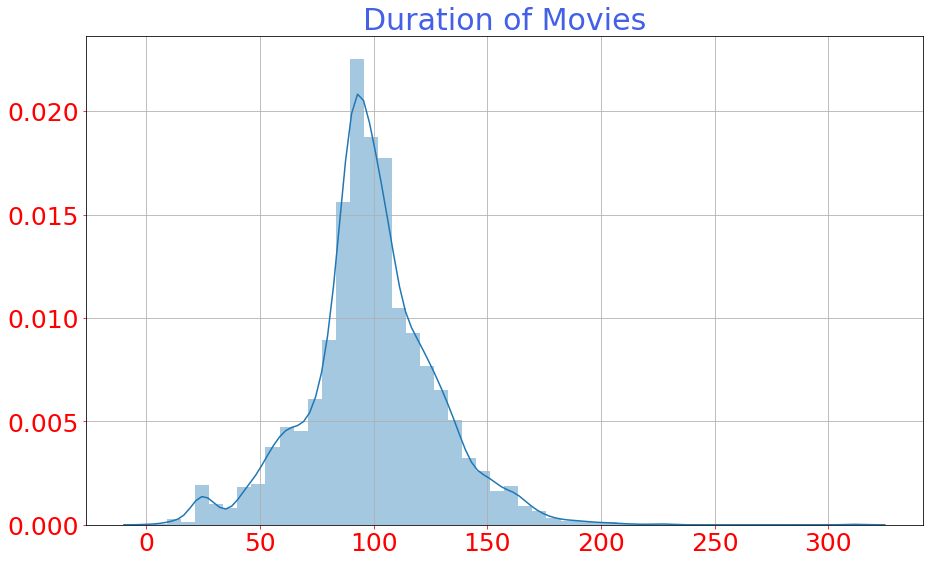

In [14]:
plt.figure(figsize = (15,9))
plt.title("Duration of Movies")
plt.grid()
sns.distplot(duration)
plt.show()

according to above graph we can say that most of the movies run for 90 min

### which directors who directed most of the movies.

In [15]:
plt.rcParams['axes.labelsize'] = 30

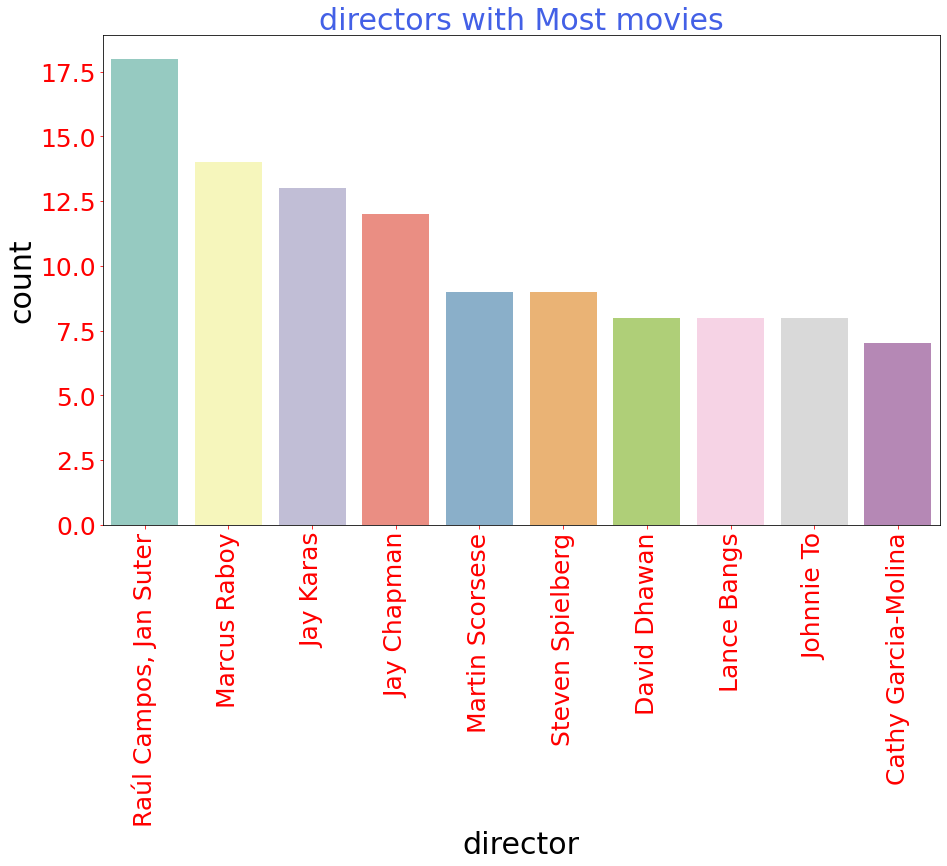

In [16]:
plt.figure(figsize = (15,9))
plt.title("directors with Most movies")
sns.countplot(x = 'director',data = data,order = data['director'].value_counts().index[:10],palette = 'Set3')
plt.xticks(rotation = 90)
plt.show()

Raul campos has directed Most number of movies. Our indian director David Dhawan has directed most number of movies in india.

### Top country produsing netflix series/movies

In [17]:
plt.rcParams['figure.figsize'] = 15,9

In [18]:
data['country'].value_counts()[:10]

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

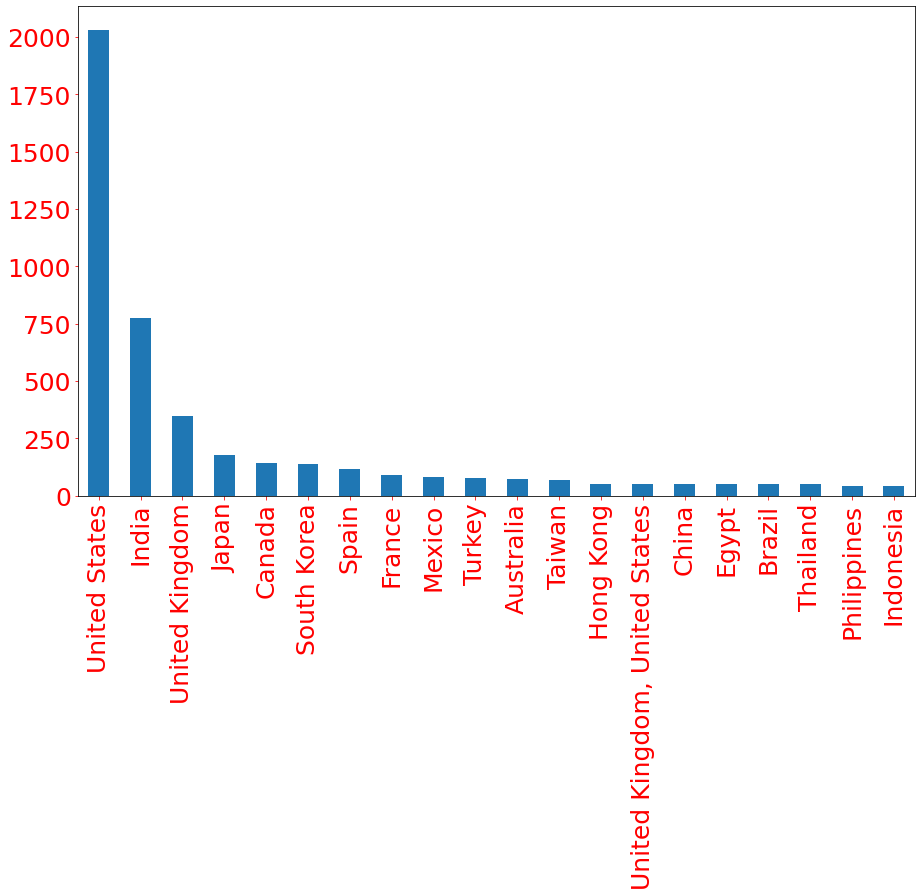

In [19]:
data['country'].value_counts()[:20].plot(kind = 'bar')
plt.show()

United States first most country who produced netflix series/movies and the India second most country.

### How many movies are with rating TV-MA and How many TV shows with rating TV_MA

In [20]:
len(data[(data['type']=='Movie') & (data['rating']=='TV-MA')])

1348

In [21]:
len(data[(data['type']=='TV Show')& (data['rating']=='TV-MA')])

679

In [22]:
data['release_year'].dtype

dtype('int64')

### Check the number of movies and tv shows released in that year and check the number of movies released maximum in which year

In [23]:
release_year = int(input("\n Enter the release year : "))
data[data['release_year']==release_year].count()


 Enter the release year : 2011


show_id         136
type            136
title           136
director         97
cast            130
country         133
date_added      136
release_year    136
rating          136
duration        136
listed_in       136
description     136
dtype: int64

In [24]:
release_year = int(input("\n Enter the release year : "))
type_ = input("\n Which type of data you want (movie/tvshows) : ").lower()
if type_=='movie':
    d = (data[(data['release_year']==release_year) & (data['type']=='Movie')][['title','rating']][:10].values)
    for i in d:
        print(f"TITLE-----> {i[0]}".center(80))
        print(f"RATING----> {i[1]}".center(80))
        print("_"*80)
        
elif type_=='tvshows':
    d = (data[(data['release_year']==release_year) & (data['type']=='TV Show')][['title','rating']][:10].values)
    for i in d:
        print(f"TITLE-----> {i[0]}".center(80))
        print(f"RATING----> {i[1]}".center(80))
        print("_"*80)
              


 Enter the release year : 2016

 Which type of data you want (movie/tvshows) : movie
                     TITLE-----> Jandino: Whatever it Takes                     
                               RATING----> TV-MA                                
________________________________________________________________________________
           TITLE-----> Krish Trish and Baltiboy: Best Friends Forever           
                                RATING----> TV-Y                                
________________________________________________________________________________
                           TITLE-----> Cézanne et moi                           
                                 RATING----> R                                  
________________________________________________________________________________
                              TITLE-----> One Day                               
                               RATING----> TV-PG                                
_______________________

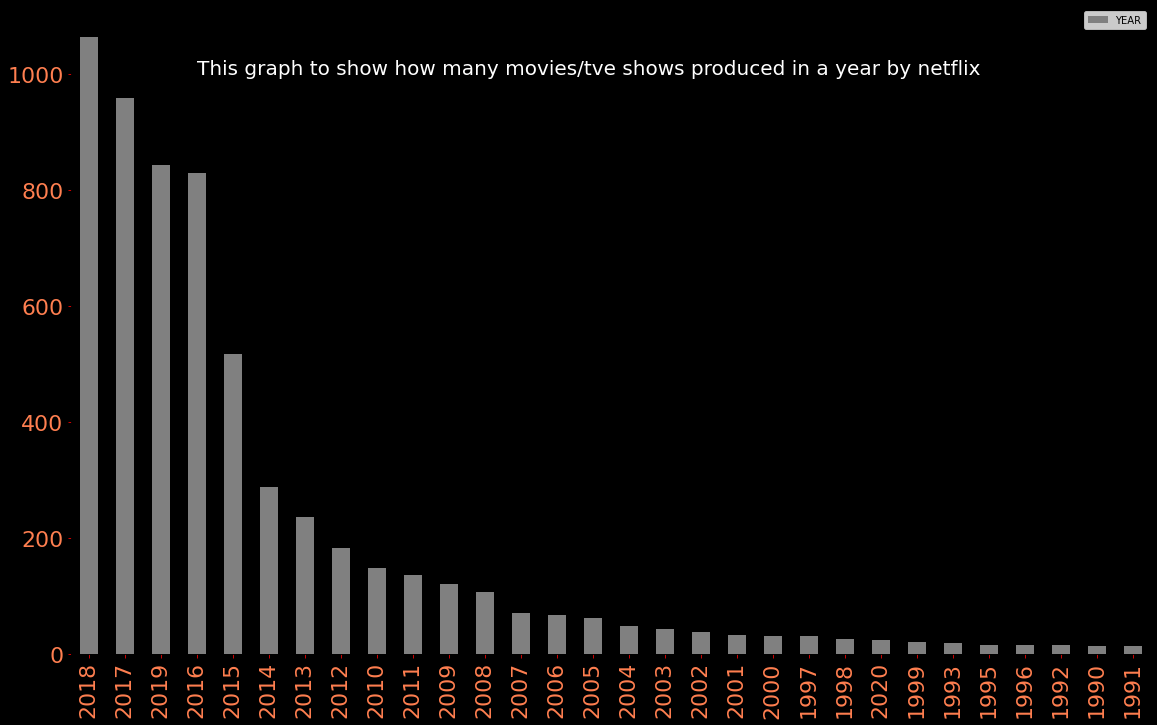

In [25]:
fig = plt.figure(facecolor = 'black')
ax = fig.add_axes([0,0,1,1],facecolor = 'black')
data['release_year'].value_counts()[:30].plot(kind = 'bar',ax = ax,color = 'grey')
ax.tick_params(axis = 'x',labelcolor = 'coral',labelsize = 22)
ax.tick_params(axis = 'y',labelcolor = 'coral',labelsize = 22)
plt.text(3,1000,'This graph to show how many movies/tve shows produced in a year by netflix',color = 'white',fontsize = 20)

plt.legend(['YEAR'])
plt.show()

### Top movies of which genre

In [26]:
d = {}
for i in data['listed_in'].apply(lambda x : x.split(",")):
    for j in i:
        j = j.strip()
        if d.get(j):
            d[j] += 1
        else:
            d[j] = 1
    

In [27]:
d

{'Children & Family Movies': 378,
 'Comedies': 1113,
 'Stand-Up Comedy': 281,
 "Kids' TV": 328,
 'Crime TV Shows': 363,
 'International TV Shows': 1001,
 'Spanish-Language TV Shows': 117,
 'International Movies': 1927,
 'Sci-Fi & Fantasy': 193,
 'Thrillers': 392,
 'Docuseries': 279,
 'Science & Nature TV': 67,
 'Action & Adventure': 597,
 'Dramas': 1623,
 'Cult Movies': 55,
 'Independent Movies': 552,
 'Romantic Movies': 376,
 'Documentaries': 668,
 'Horror Movies': 262,
 'Romantic TV Shows': 278,
 'TV Comedies': 436,
 'TV Dramas': 599,
 'TV Thrillers': 44,
 'TV Mysteries': 69,
 'British TV Shows': 210,
 'Music & Musicals': 243,
 'Reality TV': 153,
 'TV Action & Adventure': 126,
 'Anime Features': 45,
 'Teen TV Shows': 44,
 'Faith & Spirituality': 47,
 'Korean TV Shows': 132,
 'Anime Series': 117,
 'LGBTQ Movies': 60,
 'TV Horror': 54,
 'Movies': 56,
 'Stand-Up Comedy & Talk Shows': 42,
 'TV Sci-Fi & Fantasy': 68,
 'Classic Movies': 84,
 'Sports Movies': 157,
 'TV Shows': 10,
 'Classic

In [28]:
from random import choice
def getcolor():
    c = '#'
    ch = ['a','b','c','d','e','f','1','2','3','4','5','6']
    for i in range(6):
        c+=choice(ch)
    return c

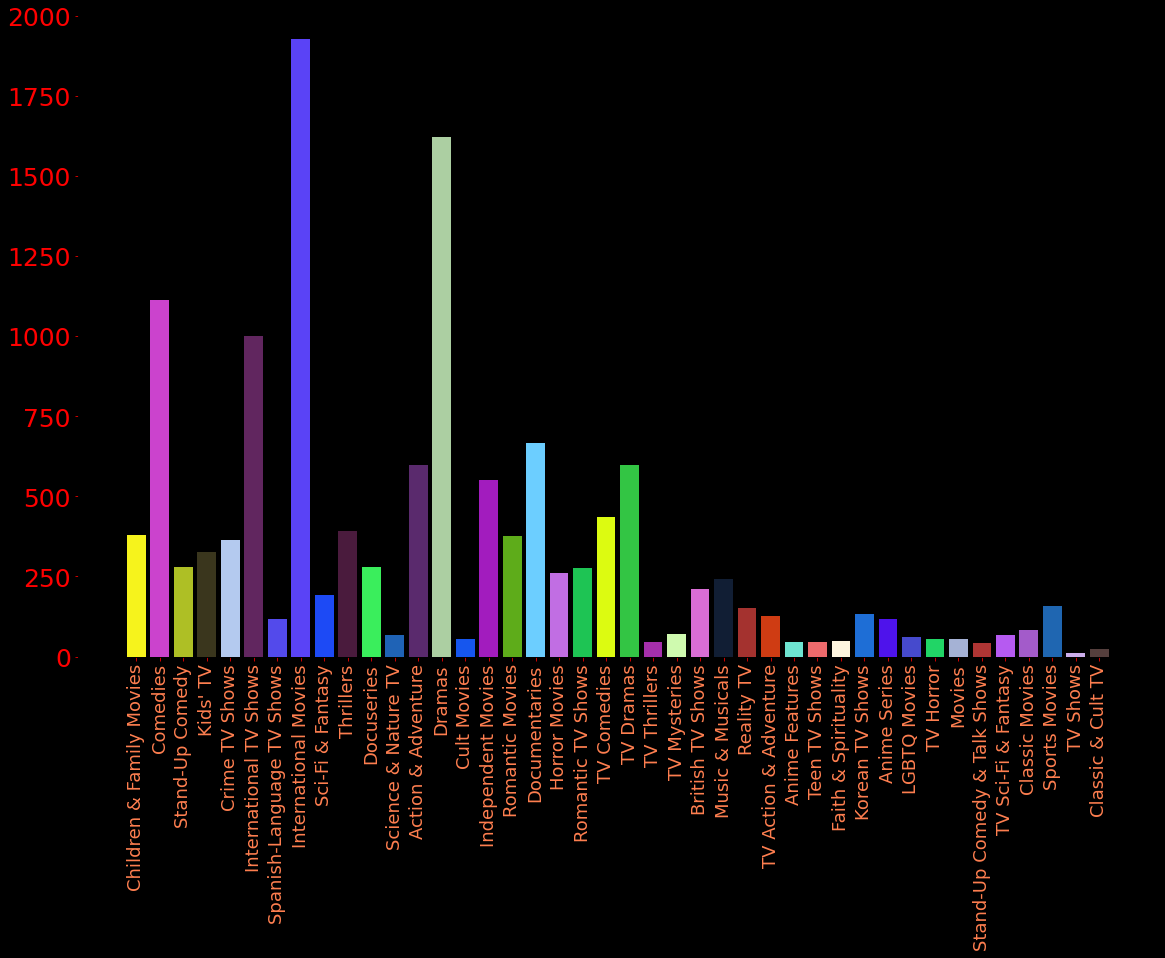

In [29]:
fig= plt.figure(facecolor = 'black')
ax = fig.add_axes([0,0,1,1],facecolor = 'black')
ax.bar(d.keys(),d.values(),color = [getcolor() for i in range(len(d.keys()))])
ax.tick_params(axis = 'x',labelcolor = 'coral',labelsize = 18,rotation = 90)
plt.show()

People most like International movies then drama type movies

### Average no. of Season in TV Shows

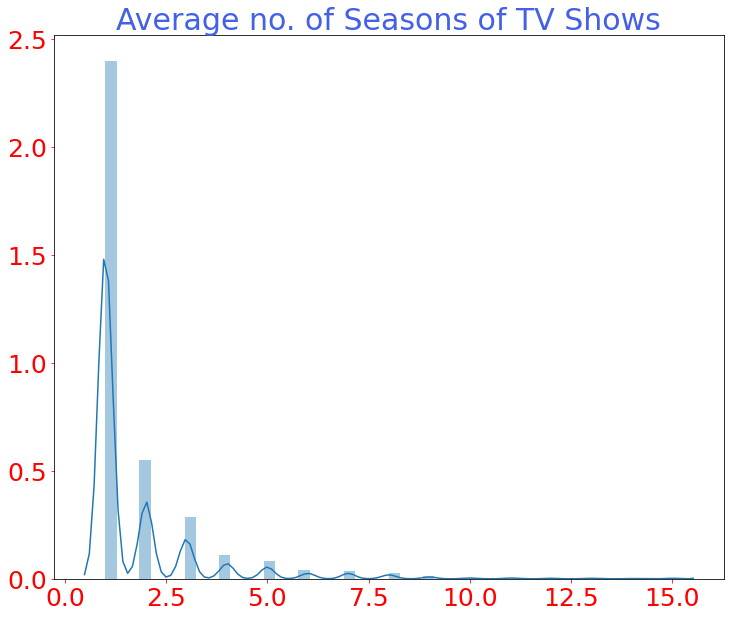

In [30]:
tv = data[data['type']=='TV Show']
durationSeries = []
tvshow = tv[tv['duration'].notna()]
for i in tvshow['duration']:
    durationSeries.append(int(i.strip('Season')))
    
plt.figure(figsize = (12,10))
plt.title('Average no. of Seasons of TV Shows')
sns.distplot(durationSeries)
plt.show()

Most of the tv shows in netflix have 1 season

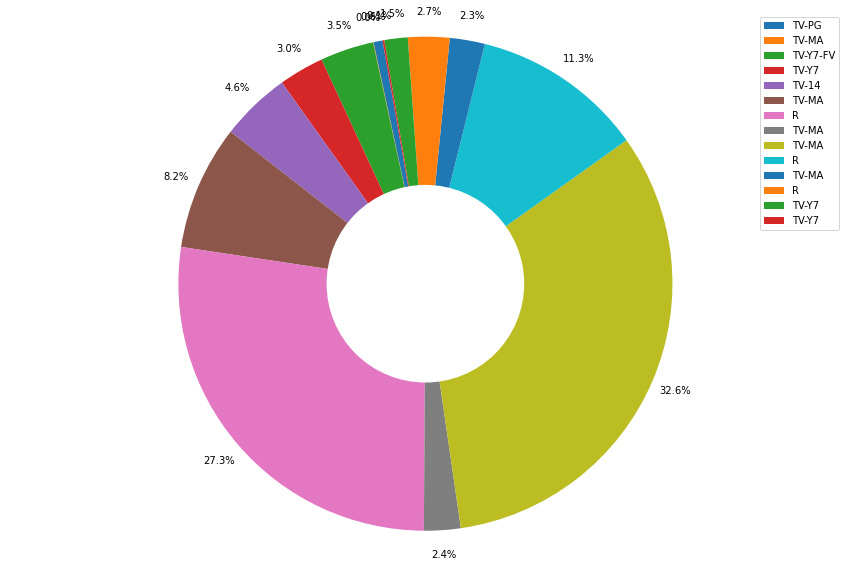

In [31]:
ratings = data.groupby('rating')[['show_id']].count().reset_index()
plt.figure(figsize = (15,10))
plt.pie(ratings['show_id'],autopct = '%1.1f%%',startangle = 100,pctdistance= 1.1)
circle = plt.Circle((0,0),0.4,fc = 'white')
figure = plt.gcf()
figure.gca().add_artist(circle)
plt.axis('equal')
plt.legend(data['rating'])
plt.show()

### catogories

In [32]:
from wordcloud import WordCloud

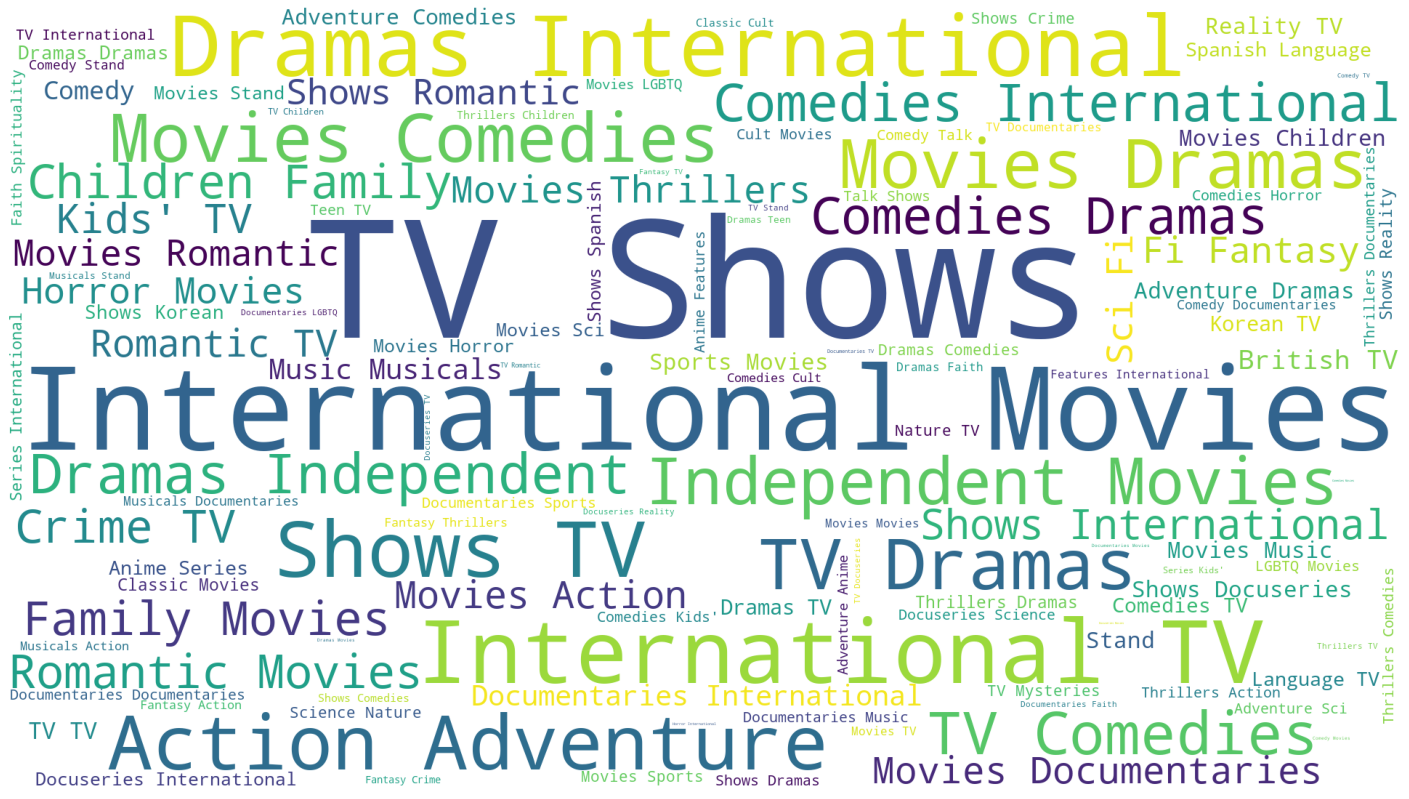

In [33]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

# End of Notebook